<a href="https://colab.research.google.com/github/gyan-krishna/exploring-ml-and-dl/blob/main/synthetic_mnist_cnn/synthetic_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gyankrishna06","key":"27d21e247726d5fee48a1fa80fb1c864"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!pwd

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-31 07:51:06           1485  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1012  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            828  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            372  
alsgroup/end-als                                            End ALS Kaggle C

In [ ]:
!kaggle datasets download -d 'prasunroy/synthetic-digits'
!unzip synthetic-digits.zip -d synthetic-digits
!mkdir procressed_data

Streaming output truncated to the last 5000 lines.
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00000.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00001.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00002.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00003.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00004.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00005.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00006.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00007.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00008.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00009.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00010.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7_00011.jpg  
  inflating: synthetic-digits/synthetic_digits/imgs_train/7/7

In [ ]:
import numpy as np
import os

from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split

from keras.models import Sequential

from keras.utils import np_utils, plot_model

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import LeakyReLU

import matplotlib.pyplot as plt

In [ ]:
dimension = 28 #image dimensions
num_channnels = 3 # number of channels in image, RGB so 3

In [ ]:
dir_path = r"/content/synthetic-digits/synthetic_digits/imgs_train"
output_path = r"/content/procressed_data/"

sub_dir_list = os.listdir(dir_path)
images = []
labels = []
warningSupress = False
warningCount   = 0

for i in range(len(sub_dir_list)):
    label = i
    #print(label)
    images_names = os.listdir(dir_path + '/'+sub_dir_list[i])
    for image_path in images_names:
        path = dir_path + '/'+ sub_dir_list[i] + '/' + image_path
        try:
            image = Image.open(path)
            resize_image = image.resize((dimension, dimension))
            array = []
            for x in range(dimension):
                sub_array = []
                for y in range(dimension):
                    sub_array.append(image.load()[x,y])
                array.append(sub_array)
            img_data = np.array(array)
            image = np.array(np.reshape(img_data, (dimension, dimension, num_channnels)))/255
            images.append(image)
            labels.append(label)
        except OSError:
            warningCount += 1
            if(not warningSupress):
                print("WARNING: file at {} is invalid image", format(path))
print("number of images   = ", len(images))
print("number of labels   = ", len(labels))
print("number of warnings = ", warningCount)

x = np.array(images)
y = keras.utils.to_categorical(np.array(labels), num_classes=len(sub_dir_list))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

np.save('{}x.npy'.format(output_path), x_train)
np.save('{}y.npy'.format(output_path), y_train)

np.save('{}test_x.npy'.format(output_path), x_test)
np.save('{}test_y.npy'.format(output_path), y_test)

print('{}test_x.npy'.format(output_path))
print('data extration and procressing over')

number of images   =  10000
number of labels   =  10000
number of warnings =  0
/content/procressed_data/test_x.npy
data extration and procressing over


In [ ]:
!ls
x = np.load(r'procressed_data/x.npy')
y = np.load(r'procressed_data/y.npy')

test_x = np.load(r'procressed_data/test_x.npy')
test_y = np.load(r'procressed_data/test_y.npy')

print(x.shape)
print(y.shape)
print(test_x.shape)
print(test_y.shape)

kaggle.json	 sample_data	   synthetic-digits.zip
procressed_data  synthetic-digits
(7500, 28, 28, 3)
(7500, 10)
(2500, 28, 28, 3)
(2500, 10)


In [ ]:
#pre procressing the data
x = x.reshape( (x.shape[0], dimension**2 * num_channnels)).astype('float32')
test_x = test_x.reshape( (test_x.shape[0], dimension**2 * num_channnels) ).astype('float32')

print(x.shape)
print(y.shape)
print(test_x.shape)
print(test_y.shape)

(7500, 2352)
(7500, 10)
(2500, 2352)
(2500, 10)


In [ ]:
#defining hyper parameters
input_shape = (dimension**2 * num_channnels, )
convolution_shape = (dimension, dimension, num_channnels)

kernel_size_1 = (4, 4)
pool_size_1   = (3, 3)

kernel_size_2 = (3, 3)
pool_size_2   = (2, 2)

drop_out_rate = 0.5
number_of_classes = 10
batch_size = 120
epochs = 100
leaky_relu_alpha = 0.05

In [ ]:
#defining the base line model
def baseline_model():
    model = Sequential()
    model.add(Reshape(input_shape = input_shape, target_shape=convolution_shape))
    
    model.add(Conv2D(32, kernel_size=kernel_size_1))
    model.add(LeakyReLU(alpha = leaky_relu_alpha))
    model.add(Conv2D(32, kernel_size=kernel_size_1))
    model.add(LeakyReLU(alpha = leaky_relu_alpha))
    model.add(MaxPooling2D(pool_size=pool_size_1))

    model.add(Conv2D(64, kernel_size=kernel_size_2))
    model.add(LeakyReLU(alpha = leaky_relu_alpha))
    model.add(Conv2D(64, kernel_size=kernel_size_2))
    model.add(LeakyReLU(alpha = leaky_relu_alpha))
    model.add(MaxPooling2D(pool_size=pool_size_2))  

    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(Dropout(drop_out_rate))

    model.add(Dense(number_of_classes, activation='softmax'))

    opt = keras.optimizers.Adam(learning_rate = 0.001, epsilon=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()
type(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 32)        1568      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        16416     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

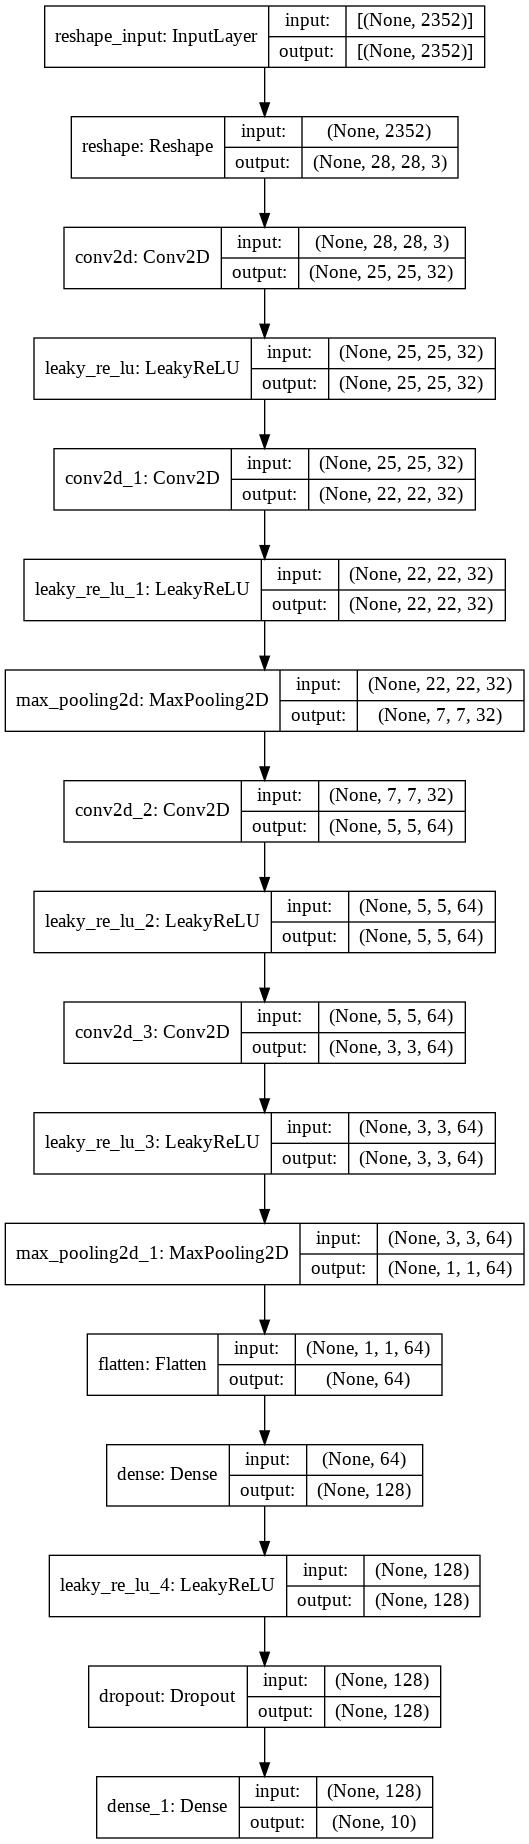

In [ ]:
plot_model(model,
          to_file = "model.jpg",
          show_shapes = True,
          show_layer_names = True,
          rankdir = "TB",
          expand_nested = False,
          dpi = 96)

In [ ]:
model_log = model.fit(x, y,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 1, #provide detailed report after each epoch
                     validation_data = (test_x, test_y))

Epoch 1/100
63/63 [==============================] - 21s 314ms/step - loss: 2.3045 - accuracy: 0.1040 - val_loss: 2.3036 - val_accuracy: 0.0920
Epoch 2/100
63/63 [==============================] - 19s 308ms/step - loss: 2.3030 - accuracy: 0.0975 - val_loss: 2.3036 - val_accuracy: 0.0896
Epoch 3/100
63/63 [==============================] - 19s 306ms/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3038 - val_accuracy: 0.0928
Epoch 4/100
63/63 [==============================] - 19s 309ms/step - loss: 2.3026 - accuracy: 0.0969 - val_loss: 2.3037 - val_accuracy: 0.0916
Epoch 5/100
63/63 [==============================] - 19s 305ms/step - loss: 2.3021 - accuracy: 0.1051 - val_loss: 2.3039 - val_accuracy: 0.0900
Epoch 6/100
63/63 [==============================] - 19s 303ms/step - loss: 2.3023 - accuracy: 0.1048 - val_loss: 2.3037 - val_accuracy: 0.0920
Epoch 7/100
63/63 [==============================] - 19s 304ms/step - loss: 2.3024 - accuracy: 0.0977 - val_loss: 2.3032 - val_accuracy:

In [ ]:
def evaluate_model(model, model_log):
    print("train loss = ", model_log.history['loss'][-1])
    print("train accuracy = ", model_log.history['accuracy'][-1])
          
    print("test loss = ", model_log.history['val_loss'][-1])
    print("test accuracy = ", model_log.history['val_accuracy'][-1])
    
    
    plt.subplot(2,1,1)
    plt.title('model accuracy')
    plt.plot(range(1, epochs+1), model_log.history['accuracy'])
    plt.plot(range(1,  epochs+1), model_log.history['val_accuracy'])
    
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    
    plt.subplot(2,1,2)
    plt.title('model loss')
    plt.plot(model_log.history['loss'])
    plt.plot(model_log.history['val_loss'])
    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'test'], loc='lower right')
    
    plt.tight_layout()
    return

train loss =  0.6545843482017517
train accuracy =  0.7665333151817322
test loss =  11.127848625183105
test accuracy =  0.12439999729394913


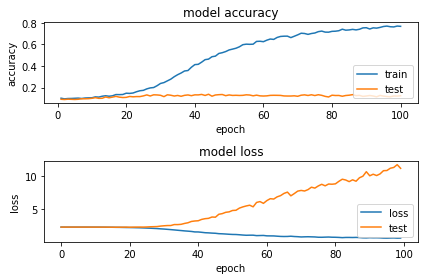

In [ ]:
evaluate_model(model, model_log)

#after 20 epochs,
#testing loss is increasing
#trainning loss is decreasing
#trainning accuracy is increasing.

#kind of over fitting, so ideal epochs ~ 20